In [61]:
# General imports and widgets
import os
if os.getcwd().split('/')[-1] != 'deepARTransit':
    os.chdir('../..')
import sys
import warnings
import numpy as np
import matplotlib.pylab as plt
from pixlc import plotting
import ipywidgets as widgets

plt.rcParams['figure.figsize'] = (16, 6)
plt.rcParams['font.size'] = 15
warnings.simplefilter("ignore")

# Project dir selection widget

project_button = widgets.RadioButtons(
    options=[os.path.join('.'), # local git repo
             os.path.join('/','Users','Mario','mount_test','deepARTransit') # cobweb         
],
    #value=experiment_folder,
    # rows=10,
    description='\t\t',
    disabled=False
)

# Experiment selection widget

experiment_button = widgets.RadioButtons(
    options=[os.path.join('cobweb', 'deeparsys_fulltime'),
             os.path.join('cobweb', 'deepartrans_fulltime'), 
             os.path.join('cobweb', 'rlc', 'deeparsys_nocov'),
             os.path.join('cobweb', 'rlc', 'deeparsys_cent'),
             os.path.join('cobweb', 'rlc', 'deeparsys_cent_2'),
             os.path.join('cobweb', 'rlc','deeparsys_pix'),
             os.path.join('cobweb', 'rlc','deeparsys_cent_pix'),
             os.path.join('cobweb', 'rlc','deeparsys_cent_24537600'),
             os.path.join('cobweb', 'rlc','deeparsys_cent_22808832'),
             os.path.join('cobweb', 'rlc','deeparsys_cent_27773440'),
],
    #value=experiment_folder,
    # rows=10,
    description='\t\t',
    disabled=False
)

In [82]:
#project directory for loading the data
project_button

RadioButtons(description='\t\t', options=('.', '/Users/Mario/mount_test/deepARTransit'), value='.')

In [83]:
#Select an experime
experiment_button

RadioButtons(description='\t\t', index=4, options=('cobweb/deeparsys_fulltime', 'cobweb/deepartrans_fulltime',…

In [84]:
from utils.config import get_config_file, process_config
from deepartransit.data_handling import data_generator

experiment_folder = experiment_button.value
project_dir = project_button.value
experiment_dir = os.path.join(project_dir, 'deepartransit', 'experiments', experiment_folder)
print(experiment_dir)
config_file = get_config_file(experiment_dir)
config = process_config(config_file)
print('Data and covariates shapes:')
data = data_generator.DataGenerator(config)
width = int(np.sqrt(data.Z.shape[0]))



/Users/Mario/mount_test/deepARTransit/deepartransit/experiments/cobweb/rlc/deeparsys_cent_2
Data and covariates shapes:
(1, 690, 1) (1, 690, 2)


In [85]:
os.listdir(os.path.join(project_dir, config.output_dir))

['loc_array_10.npy',
 'scales_array_10.npy',
 'pred_array_10.npy',
 'loc_array_20.npy',
 'scales_array_20.npy',
 'pred_array_20.npy',
 'loc_array_30.npy',
 'scales_array_30.npy',
 'pred_array_30.npy',
 'loc_array_40.npy',
 'scales_array_40.npy',
 'pred_array_40.npy',
 'loc_array_50.npy',
 'scales_array_50.npy',
 'pred_array_50.npy',
 'loc_array_60.npy',
 'scales_array_60.npy',
 'pred_array_60.npy',
 'loc_array_70.npy',
 'scales_array_70.npy',
 'pred_array_70.npy',
 'loc_array_80.npy',
 'scales_array_80.npy',
 'pred_array_80.npy',
 'loc_array_90.npy',
 'scales_array_90.npy',
 'pred_array_90.npy',
 'loc_array_100.npy',
 'scales_array_100.npy',
 'pred_array_100.npy',
 'loc_array_110.npy',
 'scales_array_110.npy',
 'pred_array_110.npy',
 'loc_array_120.npy',
 'scales_array_120.npy',
 'pred_array_120.npy',
 'loc_array_130.npy',
 'scales_array_130.npy',
 'pred_array_130.npy',
 'loc_array_140.npy',
 'scales_array_140.npy',
 'pred_array_140.npy',
 'loc_array_150.npy',
 'scales_array_150.npy',


In [86]:
d = {}
for fn in [s for s in os.listdir(os.path.join(project_dir, config.output_dir)) if (s[:4] == 'pred')]:
    step = fn.split('_')[-1].split('.')[0]
    try:
        d[int(step)] = np.load(os.path.join(project_dir, config.output_dir, fn))#.mean(axis=0)
        #pred_instr = traces_array.mean(axis=(0))
        #length_pred = pred_instr.shape[1]
        #plc_trans = data.Z[:, config.pretrans_length:config.pretrans_length+config.trans_length+1]
    except:
        print(fn)
        continue

pred_array.npy


In [87]:
step_list = sorted([int(k) for k in d if k!='array'])
#sorted_preds = [d[k] for k in step_list]
#sorted_preds[0].shape, len(sorted_preds)
print(step_list)

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 501, 511, 521, 531, 541, 542, 547, 552, 557, 562, 563, 568, 573, 578, 583, 588, 593, 598, 603, 608, 613, 618, 623, 628, 633, 638, 643, 648, 653, 658, 663, 668, 673, 678, 683, 688, 693, 698, 703]


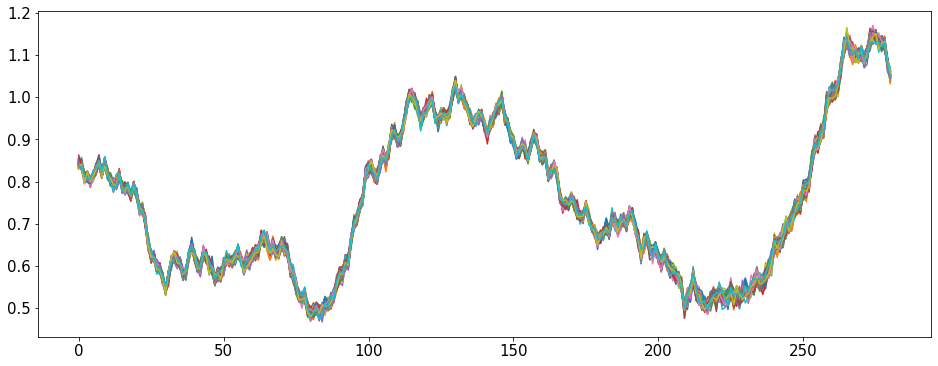

In [93]:
plt.plot(d[270][:,0,:,0].T)

In [100]:
from ipywidgets import interact

def update(k = step_list[-1]):#(50, 400, 50)):
    plt.plot(data.Z.flatten())
    plt.plot(np.load(os.path.join(project_dir, config.output_dir, 'loc_array_{}.npy'.format(k))).flatten())
    plt.plot(range(config.pretrans_length, config.pretrans_length+ config.trans_length + 1),
             d[k][:,0,:,0].T, label=k, color='red', linewidth=0.5)
    plt.plot(range(config.pretrans_length, config.pretrans_length+ config.trans_length + 1),
             d[k][:,0,:,0].mean(0), label=k, color='orange', linewidth=0.2)
    plt.show()

interact(update, k=step_list)#(step_list[0], step_list[-1], 2 * config.freq_eval))
pass

interactive(children=(Dropdown(description='k', index=88, options=(10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 11…